In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
df  = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Succesfully Removed Columns
isFraud
0    3500
1    2500
Name: count, dtype: int64
     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0 -0.399153      -0.388305       -0.229676       -0.192201       -0.283236   
1  5.275579       6.047480        7.805687       -0.331871       -0.418521   
2 -0.423321      -0.388305       -0.229676       -0.331871       -0.418521   
3 -0.354155      -0.374902       -0.229676       -0.328109       -0.374106   
4 -0.402688      -0.376141       -0.229676       -0.331871       -0.418521   

       step  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0 -0.857987           0.0            1.0         0.0           0.0   
1  0.695811           0.0            0.0         0.0           0.0   
2 -0.627596           0.0            0.0         0.0           1.0   
3 -0.225752           0.0            1.0         0.0           0.0   
4 -0.354342           0.0            0.0         0.0           0.0   

   type_TRANSFER  isFraud  


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


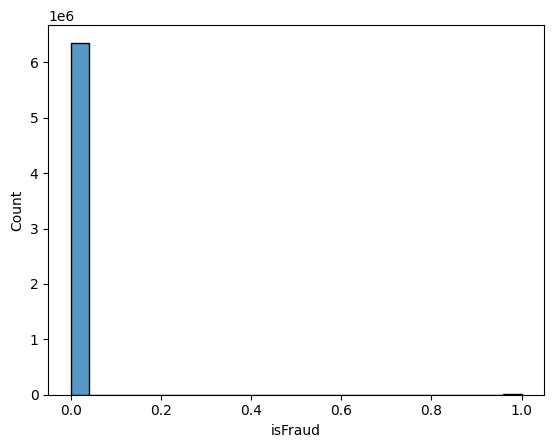

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
# First check Fraud Distribution then check for imbalance classes
sns.histplot(data=df, x='isFraud')

# Drop Columns = nameOrig,  nameDest, isFlaggedFraud
df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True, axis=1)
df
print('Succesfully Removed Columns')
df['isFraud'].value_counts()
# R&D about how can we maintain balance of data do 50% of data fraud and other 50%for legitimate

fraud_df = df[df['isFraud'] == 1].sample(n=2500, random_state=42)
true_df = df[df['isFraud'] == 0].sample(n=3500, random_state=42)

new_df = pd.concat([true_df, fraud_df], ignore_index=True)
new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(new_df['isFraud'].value_counts())

# Do One Hot Encoding and Standard Scaler on df
categorical_cols = ['type']  
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)
    ]
)
processed_data = preprocessor.fit_transform(new_df)
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_cols = numeric_cols + list(encoded_cat_cols)
final_df = pd.DataFrame(processed_data, columns=all_cols)
final_df['isFraud'] = new_df['isFraud'].values
print(final_df.head())

# Donot use train, test,split insted use manual break for train before 5000 rows and for test do for 1000 more.
X = final_df.drop('isFraud', axis=1)
y = final_df['isFraud']
X_train = X.iloc[:5000].reset_index(drop=True)
y_train = y.iloc[:5000].reset_index(drop=True)
X_test = X.iloc[5001:].reset_index(drop=True)
y_test = y.iloc[5001:].reset_index(drop=True)
print(f'Shape of X_train {X_train.shape}, X_test {X_test.shape}, y_train {y_train.shape}, and y_test {y_test.shape}')

# Export all four csv's
X_train.to_csv('X_train_may28.csv', index=False)
y_train.to_csv('y_train_may28.csv', index=False)
X_test.to_csv('X_test_may28.csv', index=False)
y_test.to_csv('y_test_may28.csv', index=False)
print("All Files have Been Successfully Exported. ✅")

In [5]:
new_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,135,CASH_OUT,43221.62,0.00,0.00,358307.99,401529.61,0
1,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.00,0.00,1
2,178,PAYMENT,816.44,0.00,0.00,0.00,0.00,0
3,253,CASH_OUT,122175.20,40787.00,0.00,9651.35,131826.55,0
4,229,TRANSFER,37019.04,37019.04,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...
5995,502,CASH_OUT,73051.02,73051.02,0.00,6049.33,79100.35,1
5996,537,CASH_OUT,127447.68,127447.68,0.00,1274456.97,1401904.65,1
5997,400,TRANSFER,4598089.88,4598089.88,0.00,0.00,0.00,1
5998,495,CASH_OUT,797710.80,797710.80,0.00,49988.57,847699.37,1


In [6]:
new_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000
mean,295.134167,7.435682e+05,1.181670e+06,5.598014e+05,8.513767e+05,1.242176e+06,0.416667
std,186.655042,1.754727e+06,3.043401e+06,2.437559e+06,2.565597e+06,2.968258e+06,0.493048
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,159.000000,3.066367e+04,5.466247e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,277.000000,1.587717e+05,9.034605e+04,0.000000e+00,0.000000e+00,1.519762e+05,0.000000
75%,399.000000,4.480099e+05,6.739274e+05,7.993000e+03,5.839506e+05,1.134541e+06,1.000000
max,743.000000,1.199796e+07,3.741827e+07,3.285196e+07,6.677827e+07,6.788014e+07,1.000000


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6000 non-null   int64  
 1   type            6000 non-null   object 
 2   amount          6000 non-null   float64
 3   oldbalanceOrg   6000 non-null   float64
 4   newbalanceOrig  6000 non-null   float64
 5   oldbalanceDest  6000 non-null   float64
 6   newbalanceDest  6000 non-null   float64
 7   isFraud         6000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 375.1+ KB
